<a href="https://colab.research.google.com/github/Brandon-Bernal-Alarcon/Machine-Learnign/blob/main/Modelos_Supervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('/content/fruit_data_with_colors.txt')#assets/fruit_data_with_colors.txt')

Este es un Data set de Frutas, buscamos poder clasificarlas, vamos a ocupar la columnas "fruit_label" para entrenar nuestro modelo, esta variable corresponde al tipo de fruta; 1: Manzana, 2: Mandarina, ..., Para la columan color_score, se clasifica la siguiente escala de colores


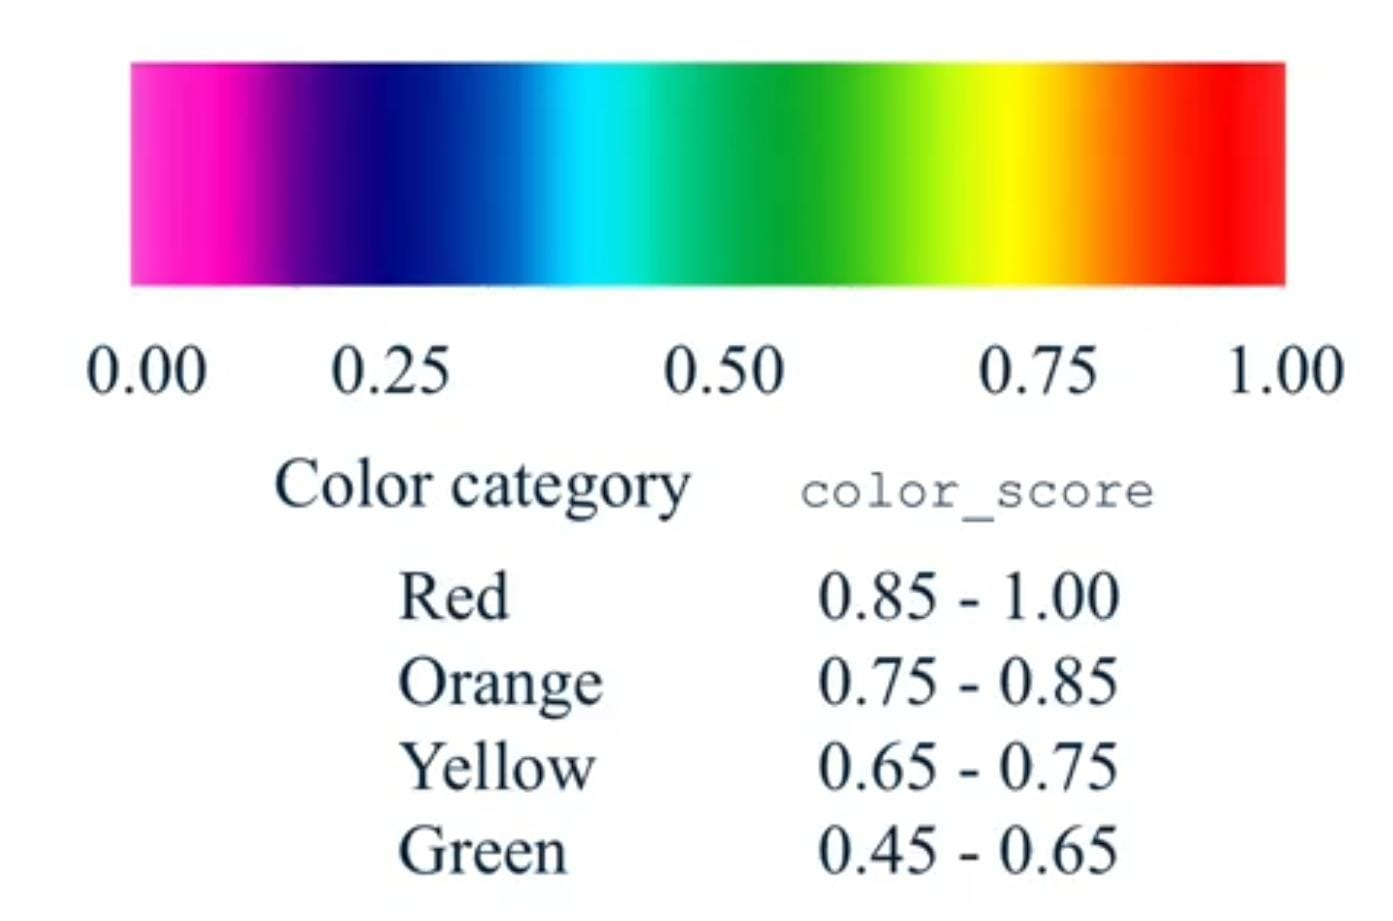

In [ ]:
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [ ]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{np.int64(1): 'apple',
 np.int64(2): 'mandarin',
 np.int64(3): 'orange',
 np.int64(4): 'lemon'}

In [ ]:
# plotting a scatter matrix
#from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#cmap = cm.get_cmap('gnuplot')

import matplotlib as mpl

cmap = mpl.colormaps['gnuplot']


scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>

In [ ]:
%matplotlib inline


<IPython.core.display.Javascript object>

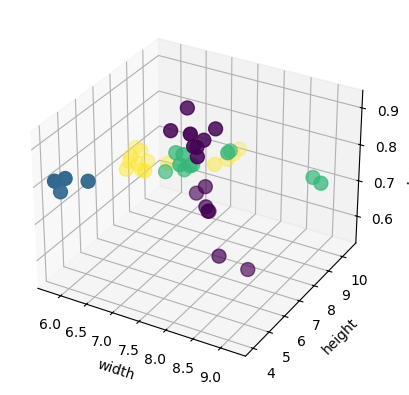

In [ ]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [ ]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/tmp/ipython-input-1886839401.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('gnuplot')


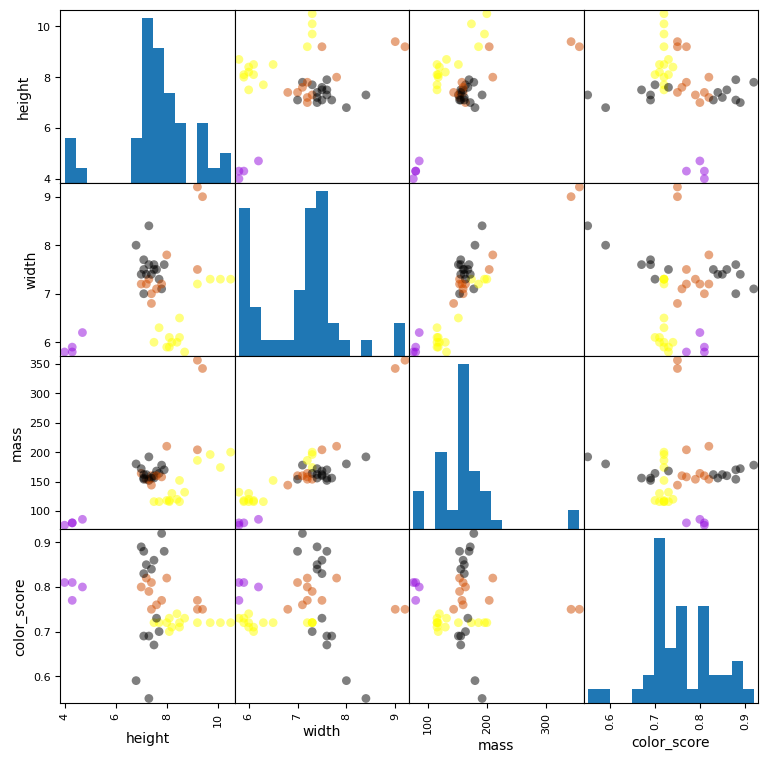

In [ ]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

A partir de ahora, ocuparemos un algoritmo de machine Learnig conocido como "K-near neighbors" o K-NN.

Este algoritmo se usa para clasificar y la regresión, es un algoritmo supervisado, basado en memoria, funicona memorizando etiquetas y usando estos ejemplos, clasifica los nuevos.

Dado un conjunto de entrenamiento X_train con etiquetas y_train, y dada una nueva instancia X_test para clasificar:

1. Encontrar las instancias más similares a X_test (Lamemoslas X_NN) que estén en X_train
2. Obtener etiquetas y_NN para las istancias en X_NN
3. Predecir las etiquetas para x_test combinando las etiquetas y_NN, por ejemplo, mediante el voto por mayoria simple

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test, y_test)

0.5333333333333333

In [ ]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
# The model expects 4 features: ['height', 'width', 'mass', 'color_score']
# Assuming a color_score of 0.75 as a placeholder for this example.
fruit_prediction = knn.predict([[5.5, 4.3, 20, 0.75]])
lookup_fruit_name[fruit_prediction[0]]

NameError: name 'knn' is not defined

In [ ]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
# The model expects 4 features: ['height', 'width', 'mass', 'color_score']
# Assuming a color_score of 0.75 as a placeholder for this example.
fruit_prediction = knn.predict([[8.5, 6.3, 100, 0.75]])
lookup_fruit_name[fruit_prediction[0]]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors # Import the neighbors module
import numpy as np # Import numpy
import matplotlib.patches as mpatches # Import mpatches

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)#,metric_params={'w': [1, 10]})
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])


    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')

    plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


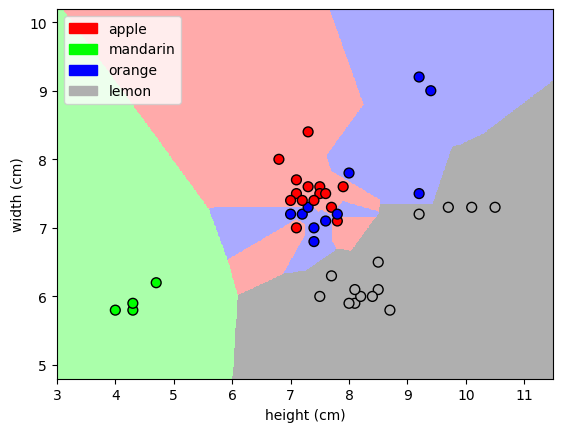

In [ ]:
plot_fruit_knn(X_train, y_train, n_neighbors = 1, weights = 'uniform')   # we choose 5 nearest neighbors

Tomamos nuestro set de entrenamiento y trazamos cada pieza de fruta utilizando dos de sus caracteristicas, en este caso la altura y anchura, estas dos caracteristicas se definen espacio de caracteristicas del clasificador-

En base a estos colores, nos da regiones de como se deben clasificar las frutas en cualquier punto de alto y ancho segun la regla del vecino más cercano.

Para el ejemplo se uso K = 1, si un dato tuviera altura de 6cm y ancho de 9cm, se clasificaria como una manzana, estas areas limitan la desicion de asignacion.

Este algoritmo funciona así, a partir de un punto busca una vecindad que cumpla con k vecinos, cuando encunetra k vecinos dentro de una circunferencial se clasifica en esa categoria.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


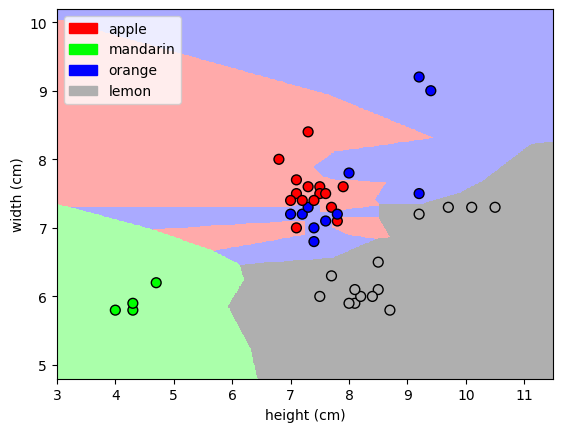

In [ ]:
plot_fruit_knn(X_train, y_train, n_neighbors = 1, weights = 'uniform')   # we choose 5 nearest neighbors

Para el algoritmo del vecino mas cercano, se necesitan especificar algunas cosas:

1. La distancia metrica a usar
2. Numero de vecinos que debe tomar
3. Decidir si una metrica tiene mayor influencia
4. Debemos ver como combinar las etiquetas para la prediccion final


**Parámetros clave**

* n_neighbors (k): número de vecinos.

* weights:

'uniform': todos pesan igual.

'distance': los más cercanos pesan más.

* metric: distancia (por defecto 'minkowski').

* p (solo con Minkowski):

p=2 euclidiana,

p=1 manhattan.


**Parametros avanzados**

* algorithm: método de búsqueda de vecinos

'auto', 'ball_tree', 'kd_tree', 'brute'.

* leaf_size: tamaño de hoja para ball_tree y kd_tree (optimización).

* metric_params: parámetros extra de la métrica (ej. pesos).

Ej.: {'w': [10, 1]} para distancia ponderada.

* n_jobs: número de núcleos de CPU (-1 usa todos).

Que tan sencible es K?

k pequeño: más sensible al ruido.

k grande: fronteras más suaves.

Escalar features cambia la distancia y la frontera de decisión.

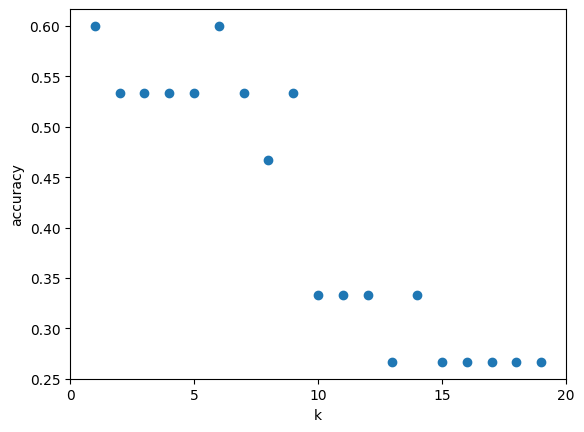

In [ ]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

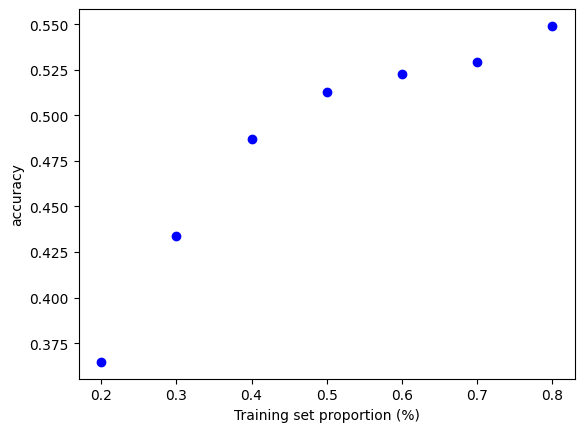

In [ ]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');